<div align="center"> <h1> 
Bamboost<br/>
🐼🐼🐼🐼
</h1> </div>

Bamboost is a Python library built for datamanagement using the HDF5 file format.
bamboost stands for a lightweight shelf which will boost your efficiency and which
will totally break if you load it heavily. Just kidding, bamboo can fully carry pandas. 

### Data architecture
<img src="./assets/data_architecture.excalidraw.png" >


### Installation
Requirements for the library: `h5py`, `mpi4py`, `numpy`, `pandas`

In addition, for the model in this tutorial: `scipy` 


> Clone the repo ([link](https://gitlab.ethz.ch/compmechmat/research/libs/dbmanager)):
> ```
> git clone git@gitlab.ethz.ch:compmechmat/research/libs/dbmanager.git 
> ```
 
> Install the package using pip:
> ```
> pip install -e .
> ```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import Manager from bamboost:
from bamboost import Manager

from lattice_model import LatticeModel  # this is the small model we will use for fun

### Mockup problem

To try out _bamboost_ we will look at a discrete RVE made up of trusses. The specimen is a unit square $x\in[0,1]$ and $y\in[0,1]$.
- `N` controls the amount of nodes
- `E` is the young's modulus which we will keep constant and equal to $1$ for brevity
- `randomness` is a parameter we use to randomly move the points away from their position in a regular grid. The larger it is, the further the points are moved from the initial position.

We will fix the bottom of the sample and move the top horizontally.
The system is solved using the direct stiffness method under the small strain assumption.
However, the sample can be "loaded" incrementally to imititate geometrical nonlinearities.
I have no clue whether the model is justified, but this tutorial is about using bamboost to store and retrieve data, so it doesn't matter at all :)

We will record the 
- the **nodal displacements**
- the **nodal forces** 
- the total **reaction force** at the bottom edge

A few functions of the model we can use:
- `get_force_bottom()`: returns the total reaction forces ($F_x$, $F_y$) at the bottom edge
- `plot()`: plot the system

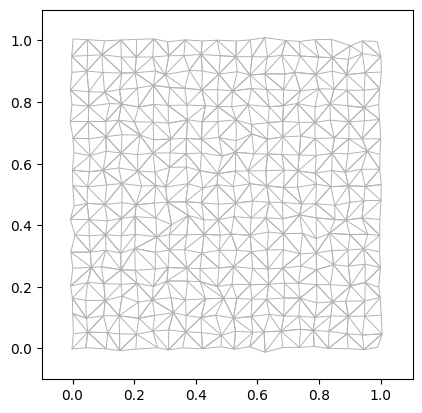

In [2]:
# You can try the effect of N and randomness here
E = 1
N = 20
randomness = .1
step = .1

model = LatticeModel(E, N, randomness)
model.plot()

Let's compute the response of 20 steps where in each step we move the top edge by 0.1...

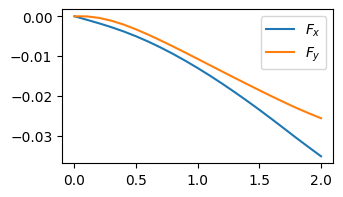

In [3]:
E = 1
N = 10
randomness = 0
step = .1

model = LatticeModel(E, N, randomness)

# displace the top edge in x-direction 21 times given by the vector:
loadsteps = np.linspace(0, 2, 21)
bottom_forces = list()
for disp, change in zip(loadsteps, np.diff(loadsteps, prepend=0)):
    model.move_top(change)
    model.solve()
    bottom_forces.append(model.get_force_bottom())
    
fig = plt.figure(figsize=(3.5, 2))
plt.plot(loadsteps, bottom_forces, label=('$F_x$', '$F_y$'))
plt.legend()

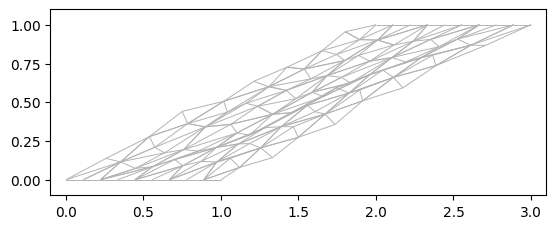

In [4]:
model.plot()

---

### Now, we want to save that data
because data is all we want

In [5]:
# CREATE A DATABASE WITH SOME FANCY NAME AND DISPLAY IT:

...

Ellipsis

In [7]:
# GIVE A NAME FOR THIS TEST SIMULATION:
name_for_this_test = ...

# GENERATE A DICTIONARY WITH ALL PARAMETERS:
parameters = {
    'E': 1,
    'N': 10,
    'randomness': 1e-2,
}

# create the lattice model
model = LatticeModel(parameters['E'], parameters['N'], parameters['randomness'])

# CREATE A NEW SIMULATION IN YOUR DATABASE:
writer = ...

# bamboost: OPTIONAL, we can use the with block to tag the file ('running', 'finished', 'failed')
with writer:

    # WRITE THE MESH:
    ...
    
    # WRITE METADATA:
    ...
    
    # MAKE A NOTE FOR LATER YOU:
    ...

    # model: loop through 40 loadsteps
    loadsteps = np.linspace(0, 4, 40)
    for disp, change in zip(loadsteps, np.diff(loadsteps, prepend=0)):
        model.move_top(change)
        model.solve()
        
        # WRITE THE NODAL DISPLACEMENTS FOR THIS STEP (use the displacement value as "time"):
        ...
        
        # WRITE THE NODAL FORCES FOR THIS STEP:
        ...

        # WRITE THE TOP DISPLACEMENT, AND THE BOTTOM REACTION FORCE:
        ...
        
        # bamboost: end the step, will increase an internal step counter
        writer.finish_step()


AttributeError: __enter__

In [3]:
# Now our database is not empty anymore :D
db = Manager('database-test')
db.df

,id,notes,status,E,N,processors,randomness,time_stamp
0,test_run,This is a single test...,Finished,1,10,1,0.01,2023-09-03 19:10:23


### Mining the data

In [11]:
# ACCESS THE SIMULATION WE HAVE DONE:
sim = ...

**1. Accessing the global data**

In [9]:
# VIEW THE GLOBAL DATA WE STORED:
...

In [12]:
# PLOT THE DISPLACEMENT-FORCE CURVE:
...

**2. Accessing the field data**

The field data is accessible using the `Simulation` member `data`...

In [13]:
# PRINT INFORMATION ON THE DATA STORED:
...

In [14]:
# RETRIEVE THE NODAL-DISPLACEMENTS OF THE LAST STEP:
nodal_disp = ...

In [15]:
# lets plot the displaced lattice at step 10 of 40 (use function `plot_lattice`)
from lattice_model import plot_lattice

# GET THE MESH:
coords, conn = ...

# GET THE NODAL DISPLACEMENT AT STEP 10:
disp = ...


plot_lattice(coords, conn, disp);

TypeError: cannot unpack non-iterable ellipsis object

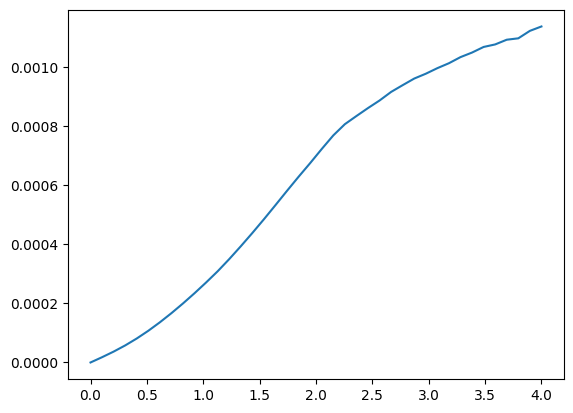

In [33]:
# Let's plot the average x-component of the absolute nodal forces vs top displacement
# (which acts here as an indicator of element forces...)

# TOP DISPLACEMENT VECTOR:
sim = db[0]
top_disp = sim.globals.top_displacement

# CONSTRUCT THE DESIRED QUANTITY:
avg_fx = np.mean(np.abs(sim.data['nodal_forces'][:, :, 0]), axis=1)

plt.plot(top_disp, avg_fx)